In [1]:
from im2gps.data.flickr_repo import FlickrPhoto
from im2gps.conf.config import load_config
from mongoengine import connect
import plotly.express as px
import pandas as pd

In [2]:
cfg = load_config(['../config-local.yaml'])
connect(db=cfg.data.db.database, host=cfg.data.db.host, port=cfg.data.db.port)

MongoClient(host=['localhost:51998'], document_class=dict, tz_aware=False, connect=True, read_preference=Primary())

In [10]:
pipeline = [{"$match": {"geo.region": "Hlavní město Praha"}}, {"$sample": {"size": 500}}]
photos = FlickrPhoto.objects.aggregate(pipeline)

In [11]:
coords = []
for photo in photos:
    c = photo['geo']['coords']['coordinates']
    coords.append({"lng": c[0], "lat": c[1]})

df_prague = pd.DataFrame(coords)

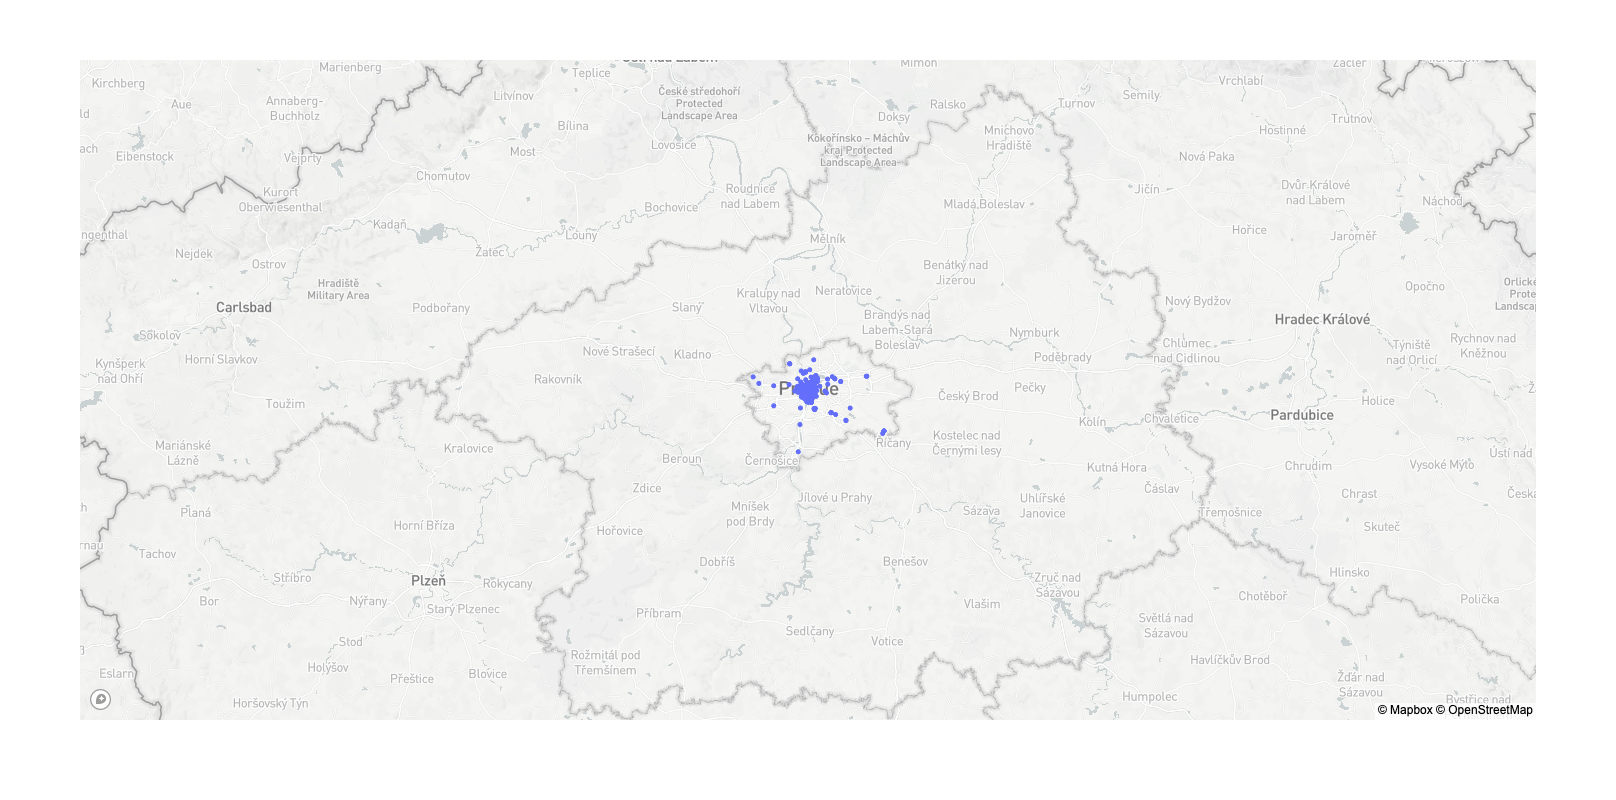

In [13]:
mb_token="pk.eyJ1IjoiYWJsYWNrLW1hcGJveCIsImEiOiJja3BwenY0bnEzZTNvMnByaWthOXRjemo1In0.-pmiSn8vK2-p6Jy0qCUpVQ"
px.set_mapbox_access_token(mb_token)
fig = px.scatter_mapbox(df_prague, lat="lat", lon="lng", height=800)
fig.show()

In [14]:
pipeline = [{"$sample": {"size": 1000}}]
photos = FlickrPhoto.objects.aggregate(pipeline)

coords = []
for photo in photos:
    c = photo['geo']['coords']['coordinates']
    coords.append({"lng": c[0], "lat": c[1]})

df = pd.DataFrame(coords)

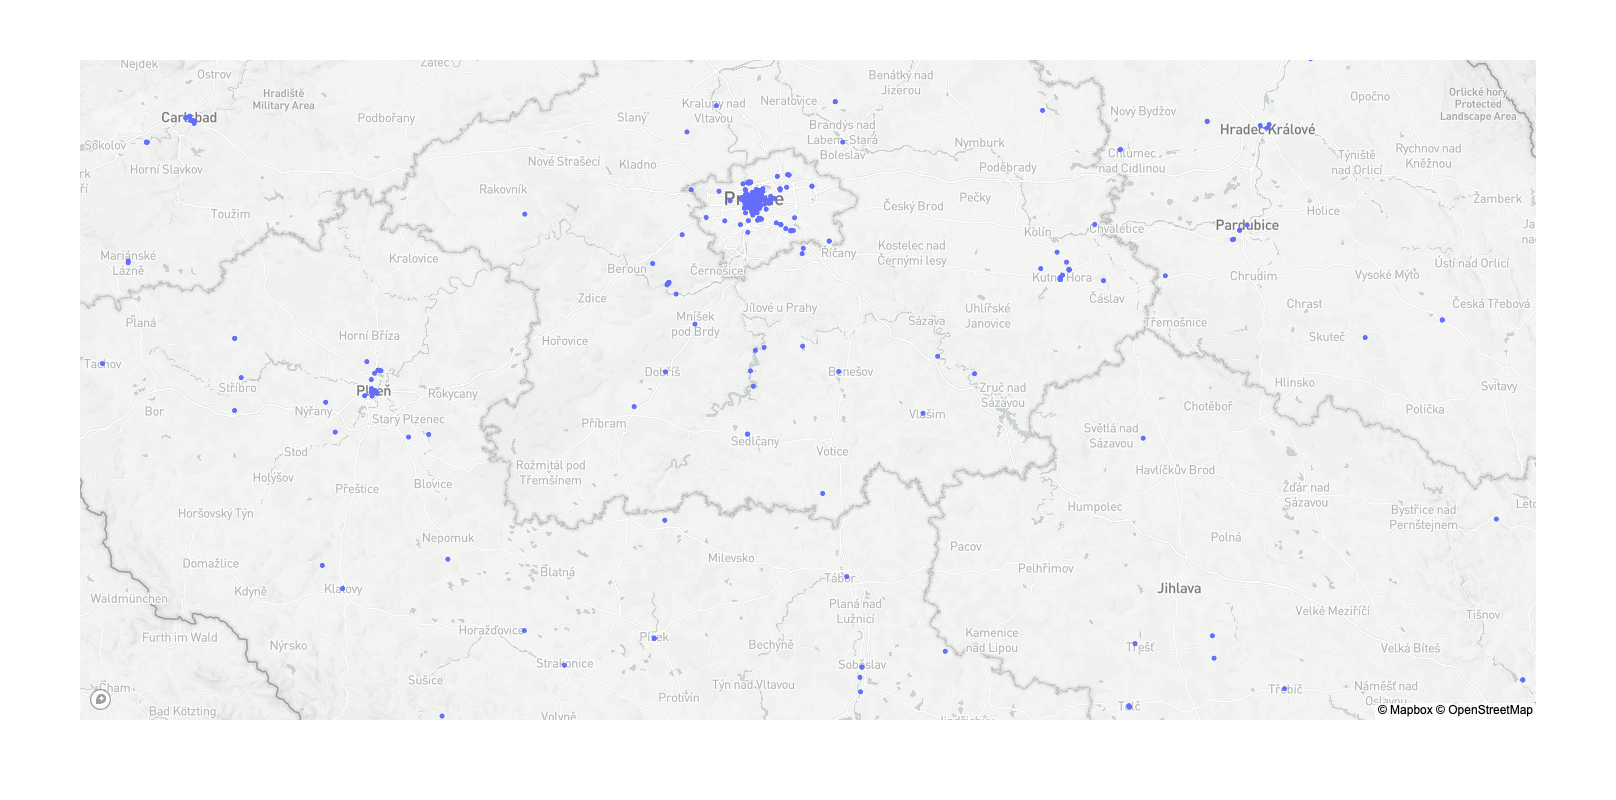

In [15]:
fig = px.scatter_mapbox(df, lat="lat", lon="lng", height=800)
fig.show()

In [30]:
from KDEpy import NaiveKDE
import numpy as np
import plotly.graph_objects as go

In [36]:
pipeline = [{"$sample": {"size": 3000}}]
photos = FlickrPhoto.objects.aggregate(pipeline)

data = np.array([photo['geo']['coords']['coordinates'] for photo in photos])
kde = NaiveKDE(bw=0.001).fit(data)
f = kde.evaluate(data)

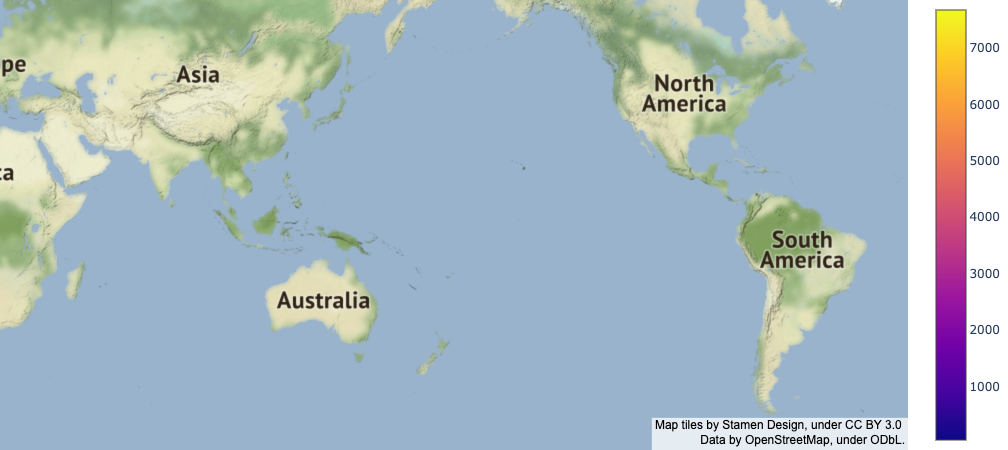

In [37]:
density_df = pd.DataFrame([{'lng': lng, 'lat': lat, 'p':p} for (lng,lat), p in zip(data, f)])

fig = go.Figure(go.Densitymapbox(lat=density_df.lat, lon=density_df.lng, z=density_df.p,
                                 radius=10))
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [38]:
density_df

,lng,lat,p
0,14.436206,50.075209,304.621153
1,14.418611,50.082069,455.304877
2,15.093584,50.627006,53.051648
3,14.542379,49.938184,53.051648
4,14.314134,48.620392,3488.302215
...,...,...,...
2995,15.632752,50.369332,88.825444
2996,14.400435,50.090397,5702.395973
2997,13.249511,50.205033,53.051648
2998,14.437166,50.053233,55.229580
